In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import glob
import os
from functools import reduce
sys.path.append('../')
from package_global_functions import *

In [3]:
# https://stackoverflow.com/questions/23528477/share-axes-in-matplotlib-for-only-part-of-the-subplots

def set_share_axes(axs, target=None, sharex=False, sharey=False):
    if target is None:
        target = axs.flat[0]
    # Manage share using grouper objects
    for ax in axs.flat:
        if sharex:
            target._shared_axes['x'].join(target, ax)
        if sharey:
            target._shared_axes['y'].join(target, ax)
    # Turn off x tick labels and offset text for all but the bottom row
    if sharex and axs.ndim > 1:
        for ax in axs[:-1,:].flat:
            ax.xaxis.set_tick_params(which='both', labelbottom=False, labeltop=False)
            ax.xaxis.offsetText.set_visible(False)
    # Turn off y tick labels and offset text for all but the left most column
    if sharey and axs.ndim > 1:
        for ax in axs[:,1:].flat:
            ax.yaxis.set_tick_params(which='both', labelleft=False, labelright=False)
            ax.yaxis.offsetText.set_visible(False)

latexFont(ticklabelssize=12,labelsize=14) # ticklabelssize=10, labelsize=12, legendsize=8

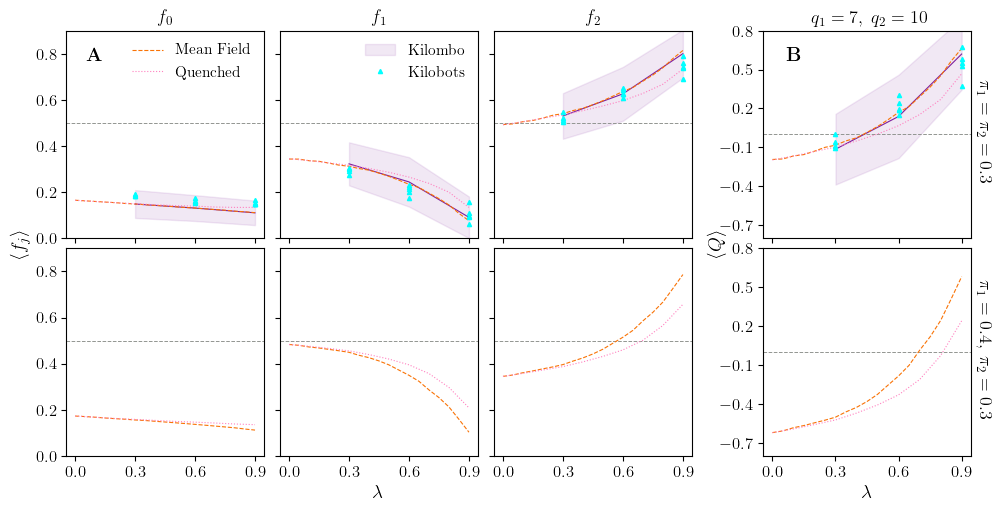

In [81]:
fig, ax = plt.subplots(2,4, figsize=(10.0, 5.0), sharex=True, width_ratios=[1,1,1,1.33]) #constrained_layout=True
# fig, ax = plt.subplots(2,4, figsize=(9.3, 5.0), sharex=True, width_ratios=[1,1,1,1.33]) #constrained_layout=True
fig.subplots_adjust(left=0.065, right=0.97, bottom=0.1, top=0.95, hspace=0.05, wspace=0.075)

push = 0.055
boxQsym = ax[0,3].get_position()
axQsym = fig.add_axes([boxQsym.xmin+push, boxQsym.ymin, boxQsym.width-push, boxQsym.height])
ax[0,3].axis('off')
boxQasym = ax[1,3].get_position()
axQasym = fig.add_axes([boxQasym.xmin+push, boxQasym.ymin, boxQasym.width-push, boxQasym.height])
ax[1,3].axis('off')



for i in range(2):
    for j in range(3):
        ax[i,j].set(ylim=(0.0,0.9))

axQsym.set(ylim=(-0.8, 0.8))
axQasym.set(ylim=(-0.8, 0.8))

set_share_axes(ax[:,:3], sharey=True)

ax[0,0].set_title(r'$f_0$', fontsize=13)
ax[0,1].set_title(r'$f_1$', fontsize=13)
ax[0,2].set_title(r'$f_2$', fontsize=13)
ax[1,1].set_xlabel('$\lambda$')

axQsym.axhline(0.0, ls='--', color='xkcd:gray', lw=0.7)
axQasym.axhline(0.0, ls='--', color='xkcd:gray', lw=0.7)

for i in range(2):
    for axis in ax[i,0:3]:
        axis.axhline(0.5, ls='--', color='xkcd:gray', lw=0.7)

axQsym.set_yticks([-0.7, -0.4, -0.1, 0.2, 0.5, 0.8])
axQasym.set_yticks([-0.7, -0.4, -0.1, 0.2, 0.5, 0.8])
axQasym.set_xlabel('$\lambda$')

for axis in list(ax[0,0:3]) + [axQsym, axQasym]:
    axis.set_xticks([0.0, 0.3, 0.6, 0.9])
axQsym.set_xticklabels([])

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel(r"$\langle f_j \rangle$")

fig.add_subplot(144, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel(r"$\langle Q \rangle$", labelpad=0.06)

q1, q2 = 7, 10
pi_sym = 0.3
pi1_asym, pi2_asym = 0.4, 0.2

fig.text(0.975, 0.65, f'$\pi_1 = \pi_2 = {pi_sym}$', fontsize=13, rotation=270)
fig.text(0.975, 0.18, f'$\pi_1 = {pi1_asym}, \; \pi_2 = {pi_sym}$', fontsize=13, rotation=270)
fig.text(0.81, 0.965, f'$q_1 = {q1}, \; q_2 = {q2}$', fontsize=13)
fig.text(0.085, 0.89, r'$\textbf{A}$', fontsize=14)
fig.text(0.785, 0.89, r'$\textbf{B}$', fontsize=14)

# kilombo simulations data: #################################################################################################################
dfkm = pd.read_csv('../sim_some_params_frozen/other_res_files/kilomboStatValues_variableN.csv')
dfkm_sym = dfkm.query('pi1 == @pi_sym & pi2 == @pi_sym & N == 35')
for i,axis,label in zip(range(4), list(ax[0,0:3])+[axQsym,], ['f0', 'f1', 'f2', 'Q']):
    dfkm_sym_j = dfkm_sym.query('parameter == @label')
    if i == 1:
        axis.fill_between(dfkm_sym_j['lambda'], dfkm_sym_j['stat.value']-dfkm_sym_j['sv.sd'], dfkm_sym_j['stat.value']+dfkm_sym_j['sv.sd'], 
                          color='xkcd:purple', alpha=0.1, label='Kilombo')
    else:
        axis.fill_between(dfkm_sym_j['lambda'], dfkm_sym_j['stat.value']-dfkm_sym_j['sv.sd'], dfkm_sym_j['stat.value']+dfkm_sym_j['sv.sd'], 
                          color='xkcd:purple', alpha=0.1)
    axis.plot(dfkm_sym_j['lambda'], dfkm_sym_j['stat.value'], lw=0.8, color='xkcd:purple')


# mean field simulations data: ############################################################################################################
# dfmf = pd.read_csv('../sim_some_params/')
dfmf = pd.read_csv('sim_results.csv')
dfmf = dfmf.rename(columns={'lambda':'lamb'})
dfmf = dfmf.query('lamb <= 0.9')
dfmf_sym = dfmf.query('q1 == @q1 & q2 == @q2 & pi1 == @pi_sym & pi2 == @pi_sym')
dfmf_asym = dfmf.query('q1 == @q1 & q2 == @q2 & pi1 == @pi1_asym & pi2 == @pi2_asym')

ax[0,0].plot(dfmf_sym['lamb'], dfmf_sym['f0'], lw=0.8, ls='--', color='xkcd:orange', label='Mean Field')
ax[0,1].plot(dfmf_sym['lamb'], dfmf_sym['f1'], lw=0.8, ls='--', color='xkcd:orange')
ax[0,2].plot(dfmf_sym['lamb'], dfmf_sym['f2'], lw=0.8, ls='--', color='xkcd:orange')
axQsym.plot(dfmf_sym['lamb'], dfmf_sym['Q'], lw=0.8, ls='--', color='xkcd:orange')

ax[1,0].plot(dfmf_asym['lamb'], dfmf_asym['f0'], lw=0.8, ls='--', color='xkcd:orange')
ax[1,1].plot(dfmf_asym['lamb'], dfmf_asym['f1'], lw=0.8, ls='--', color='xkcd:orange')
ax[1,2].plot(dfmf_asym['lamb'], dfmf_asym['f2'], lw=0.8, ls='--', color='xkcd:orange')
axQasym.plot(dfmf_asym['lamb'], dfmf_asym['Q'], lw=0.8, ls='--', color='xkcd:orange')


# quenched simulations data: ################################################################################################################
interac_r = 6.5
dfq = pd.read_csv('../sim_some_params_frozen/Galla/35_bots/sim_fp_results_er_1.5_NOPUSH.csv')
dfq_sym = dfq.query('q1 == @q1 & q2 == @q2 & interac_r == @interac_r & pi1 == @pi_sym & pi2 == @pi_sym')
dfq_asym = dfq.query('q1 == @q1 & q2 == @q2 & interac_r == @interac_r & pi1 == @pi1_asym & pi2 == @pi2_asym')

ax[0,0].plot(dfq_sym['lambda'], dfq_sym['f0'], lw=0.8, ls=':', color='xkcd:pink', label='Quenched')
ax[0,1].plot(dfq_sym['lambda'], dfq_sym['f1'], lw=0.8, ls=':', color='xkcd:pink')
ax[0,2].plot(dfq_sym['lambda'], dfq_sym['f2'], lw=0.8, ls=':', color='xkcd:pink')
axQsym.plot(dfq_sym['lambda'], dfq_sym['Q'], lw=0.8, ls=':', color='xkcd:pink')

ax[1,0].plot(dfq_asym['lambda'], dfq_asym['f0'], lw=0.8, ls=':', color='xkcd:pink')
ax[1,1].plot(dfq_asym['lambda'], dfq_asym['f1'], lw=0.8, ls=':', color='xkcd:pink')
ax[1,2].plot(dfq_asym['lambda'], dfq_asym['f2'], lw=0.8, ls=':', color='xkcd:pink')
axQasym.plot(dfq_asym['lambda'], dfq_asym['Q'], lw=0.8, ls=':', color='xkcd:pink')


# kilobots experiments data: 
dfkb = pd.read_csv('../sim_some_params_frozen/other_res_files/kilobot_statVals_varN_varl_useLastIters_corrected_pi1_0.3_pi2_0.3_q1_7_q2_10.csv')
for l in [0.3, 0.6, 0.9]:
    dfkb_l = dfkb.query('lamb == @l & N == 35')
    for j,flabel in enumerate(['f0_avgs_trajs', 'f1_avgs_trajs', 'f2_avgs_trajs']):
        fjs_str = list(dfkb_l[flabel])[0]
        fjs_str = fjs_str[1:-1]
        fjs = [float(v) for v in fjs_str.split(',')]
        if j == 1 and l == 0.3:
            ax[0,j].plot([dfkb_l['lamb']]*len(fjs), fjs, marker='^', markersize=3, color='xkcd:cyan', lw=0, label='Kilobots')
        else:
            ax[0,j].plot([dfkb_l['lamb']]*len(fjs), fjs, marker='^', markersize=3, color='xkcd:cyan', lw=0)
        if j == 1:
            Qs = -2*np.array(fjs)
        if j == 2:
            Qs = Qs + np.array(fjs)
            axQsym.plot([dfkb_l['lamb']]*len(Qs), Qs, marker='^', markersize=3, color='xkcd:cyan', lw=0)

ax[0,0].legend(fontsize=11, ncol=1, frameon=False)
ax[0,1].legend(fontsize=11, ncol=1, frameon=False)

fig.savefig('figure4_comparison_results_MF_Q_kilombo_kilobots.pdf')